# Introduction
매수등락률, 뉴스기사, 최대거래대금을 갖춘 상태의 승률과 손익비는 어떨까?  
유튜브: https://youtu.be/OMBsoe5xB3M

# Import

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [20]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,10이격도,20이격도,최대거래대금(억),최소거래대금(억)
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1,4.38,9.72,113,25
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1,0.93,1.72,113,16
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1,0.35,0.09,113,2
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1,1.57,1.94,62,0
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1,0.87,2.06,72,3


# Preprocessing

In [21]:
df = df[df['뉴스기사'] == 1]
df = df[df['매수등락률'] > 12]
df = df[df['최대거래대금(억)'] > 60]

# Probability

In [22]:
win = len(df[df['수익률'] > 0])
lose = len(df[df['수익률'] <= 0])

In [23]:
prob = round(win/(win+lose)*100)

In [24]:
print(prob,'%')

68 %


# Visualization

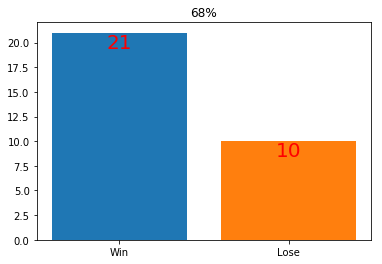

In [26]:
plt.bar('Win', win)
plt.bar('Lose', lose)
plt.text('Win', win, win, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text('Lose', lose, lose, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.title('68%')
plt.show()

# Mean

In [27]:
win = round(df[df['수익률'] > 0]['수익률'].mean(),2)
lose = round(df[df['수익률'] <= 0]['수익률'].mean(),2)

In [28]:
print(win, lose)

2.25 -0.94


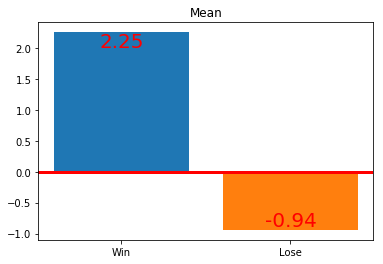

In [29]:
plt.bar('Win', win)
plt.bar('Lose', lose)
plt.axhline(y=0, color='r', linewidth=3)
plt.text('Win', win, win, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text('Lose', lose, lose, color='r', horizontalalignment='center', verticalalignment='bottom', fontsize=20)
plt.title('Mean')
plt.show()

# Median

In [30]:
win = round(df[df['수익률'] > 0]['수익률'].median(),2)
lose = round(df[df['수익률'] <= 0]['수익률'].median(),2)

In [31]:
print(win, lose)

2.14 -1.02


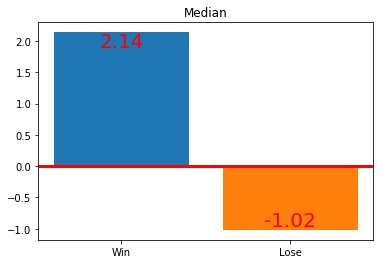

In [32]:
plt.bar('Win', win)
plt.bar('Lose', lose)
plt.axhline(y=0, color='r', linewidth=3)
plt.text('Win', win, win, color='r', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text('Lose', lose, lose, color='r', horizontalalignment='center', verticalalignment='bottom', fontsize=20)
plt.title('Median')
plt.show()

# Results
승률 68%  
손익비 2:1

# Conclusion
삼박자를 갖추면 승률과 손익비 모두 높아진다.